In [1]:
import os
from glob import glob
from PIL import Image
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [11]:
num_class = 6
num_photos = np.zeros(num_class, dtype=int)
num_pixels = np.zeros(num_class, dtype=int)

gtFine_folder = "/home/user/WindowsShare/05. Data/02. Training&Test/022. Ministry of Ocean/003_2022_강화도어항/gtFine"
gt_list = glob(os.path.join(gtFine_folder, "*", "*gtFine_labelIds.png"))

In [27]:
# # cityscapes
# import json

# with open('/home/user/WEAK_DA/weak-da-seg/data/cityscapes_list/info.json', 'r') as fp:
#     info = json.load(fp)
# mapping = np.array(info['label2train'], dtype=int)

# def label_mapping(input, mapping):
#     output = np.copy(input)
#     for ind in range(len(mapping)):
#         output[input == mapping[ind][0]] = mapping[ind][1]
#     return np.array(output, dtype=np.int64)

In [12]:
for gt_path in tqdm(gt_list):
            
    gt = Image.open(gt_path)
    gt_array = np.array(gt)

    # gt_array = label_mapping(gt_array, mapping)
    
    unique = np.unique(gt_array, return_counts=True)
    included_class_list = unique[0]
    num_per_class = unique[1]

    for i, class_id in enumerate(included_class_list):
        if class_id == 255:
            pass
        else:
            num_photos[class_id] += 1
            num_pixels[class_id] += num_per_class[i]

# class_id_list = info['label']
class_id_list = [i for i in range(num_class)]

num_photos_dict = dict(zip(class_id_list, num_photos))
num_pixels_dict = dict(zip(class_id_list, num_pixels))

print("number of photos for each class: ", num_photos_dict)
print("number of pixels for each class: ", num_pixels_dict)

100%|██████████| 680/680 [00:51<00:00, 13.24it/s]

number of photos for each class:  {0: 680, 1: 338, 2: 87, 3: 570, 4: 0, 5: 0}
number of pixels for each class:  {0: 2706818270, 1: 2661831, 2: 2207651, 3: 140438968, 4: 0, 5: 0}


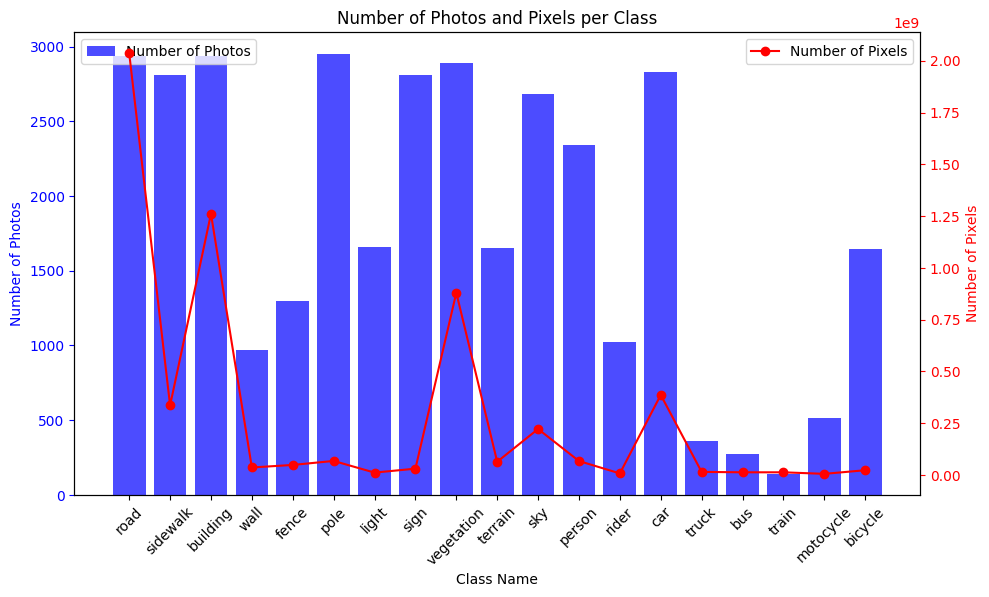

In [39]:
# Convert dictionaries to lists for plotting
class_ids = list(num_photos_dict.keys())
num_photos_values = list(num_photos_dict.values())
num_pixels_values = list(num_pixels_dict.values())

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Bar graph for num_photos
ax1.bar(class_ids, num_photos_values, color='b', alpha=0.7, label='Number of Photos')
ax1.set_xlabel('Class Name')
ax1.set_ylabel('Number of Photos', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(loc='upper left')

# Creating a second y-axis for num_pixels
ax2 = ax1.twinx()
ax2.plot(class_ids, num_pixels_values, color='r', marker='o', label='Number of Pixels')
ax2.set_ylabel('Number of Pixels', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(loc='upper right')

# Rotate x-axis labels for both axes
ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)

# Use tight layout
plt.tight_layout()

# Title and show the plot
plt.title('Number of Photos and Pixels per Class')
plt.show()

In [31]:
f1_improvement = [0.05815484, 3.96902317, -0.05797745, -4.82516972,	7.19073703, 5.45165547,	7.85405568,	4.94732014,	-0.67501393, -3.10581379, 1.24810895, -3.24222944, 6.56687291, -0.04863403, 14.39496855, 9.19899691, 35.77343323, 9.48709573, 0.20835036]

In [32]:
correlation_coefficient = np.corrcoef(num_pixels_values, f1_improvement)[0, 1]

print(f"상관계수: {correlation_coefficient}")

상관계수: -0.28700829459816185


In [38]:
correlation_coefficient = np.corrcoef(num_photos_values, f1_improvement)[0, 1]

print(f"상관계수: {correlation_coefficient}")

상관계수: -0.5920311194484299
